# Wrangle Project

In [1]:
# Import packages needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tweepy
import json

% matplotlib inline

## Collect data
### Object
#### 1. given twitter data

  upload

#### 2. prediction image data
  
  download with `requests` from url `https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv`
  
#### 3. additional data from json file

  since it's difficult to get access to twitter, we use provided txt file.

### Log
#### 1. given twitter data

  Upload `twitter-archive-enhanced.csv`

#### 2. prediction image data

  Use requests to download data from given url

In [2]:
# use requests to download
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
# save text to Prediction-image-data.csv
file_name = 'image_predictions.tsv'
with open(file_name, 'w') as file:
    file.write(r.text)

#### 3. additional data from json file
  Upload `tweet_json.txt`
  
### Read file

- [Read multi json objects](https://www.jianshu.com/p/b6a02b49845c)

In [3]:
tweet_info = pd.read_csv('twitter-archive-enhanced.csv')
image_info = pd.read_csv('image_predictions.tsv', sep='\t')
# json.load can't deal with multiple json objects, use dump first
tweet_json_info = []
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        tweet_json_info.append(json.loads(line))

### Conclude

Data stored in `tweet_info`, `image_info`, `tweet_json_info`

## Assess

Dataset: `tweet_info`, `image_info`, `tweet_json_info`

- Missing data
- Format
- Accuracy
- Consistency

[Tweet data reference](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html)

### 1. tweet_info

In [4]:
tweet_info.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
595,798701998996647937,NaN,NaN,2016-11-16 01:39:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We normally don't rate marshmal...,7.186315e+17,4.196984e+09,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None
608,797971864723324932,NaN,NaN,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12,10,None,None,None,pupper,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lillie. She's a Rutabagan Floofem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712...,11,10,Lillie,None,None,pupper,None


In [5]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
tweet_info.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [7]:
# if there are duplicated tweet
tweet_info.tweet_id.duplicated().sum()

0

In [8]:
tweet_info.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
Toby          7
Buddy         7
an            7
Jax           6
Oscar         6
Leo           6
Stanley       6
Scout         6
Bella         6
Koda          6
Jack          6
Milo          6
Rusty         6
Dave          6
very          5
           ... 
Stu           1
Schnozz       1
Jersey        1
Bronte        1
Petrick       1
DayZ          1
Perry         1
Binky         1
Clyde         1
Ridley        1
Tycho         1
Akumi         1
Jeffrie       1
Kane          1
Striker       1
Fwed          1
Arya          1
Marvin        1
Harry         1
Godzilla      1
Dutch         1
Kawhi         1
Banjo         1
Maks          1
Biden         1
Berkeley      1
Richie        1
Lilli         1
Wesley        1
Tripp         1
Name: name, Length: 957,

In [9]:
tweet_info[tweet_info.name=='a'].text[2153]

"This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM"

In [10]:
tweet_info[(tweet_info.pupper!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [11]:
tweet_info[(tweet_info.floofer!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [12]:
tweet_info[(tweet_info.puppo!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


### 2. image_info

In [13]:
image_info.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. tweet_json

In [15]:
len(tweet_json_info)

2352

In [16]:
tweet_json_info[4]

{'created_at': 'Sat Jul 29 16:00:24 +0000 2017',
 'id': 891327558926688256,
 'id_str': '891327558926688256',
 'full_text': 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 891327551943041024,
    'id_str': '891327551943041024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
    'url': 'https://t.co/AtUZn91f7f',
    'display_url': 'pic.twitter.com/AtUZn91f7f',
    'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'},
     'large': {'w': 720, 'h': 

### Quality
#### tweet_info

1. missing data(need `retweet_count` and `favorite_count`)

2. there are some retweeted tweets

3. Types
    
    - tweet_id is type int64 

    - in_reply_to_status_id is type float64 

    - in_reply_to_user_id is type float64 

    - retweeted_status_id is type float64 

    - retweeted_status_user_id is type float64 

    - timestamp is object type
    
    - retweeted_status_timestamp is type object 

4. timestamp has +0000 at end

5. source has tag a, and href link
    
6. dogs has no name displayed as None, which isn't np.nan in pandas

7. dogs have name begin with [a-z], like 'a', 'an', 'the', and others, obviously not a dog name.

8. breeds of dogs displayed as None

9. 12 records have `doggo` and `pupper`, 1 record has `doggo` and `puppo`, and 1 record has `doggo` and `floofer`.

10. `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` (don't need them)

#### image_info

1. tweet_id is type int64

2. too many prediction results

#### tweet_json_info

1. many redundant data
    
### Tidy

#### tweet_info

1. last four columns, `doggo` `floofer` `pupper` `puppo` can be integrate into one column `Stage`
2. columns `numerator` and `denomitor` can be one column `score`

#### image_info

1. image_info should be a part of tweet_info

## Clean

In [17]:
tweet_info_clean = tweet_info.copy()
image_info_clean = image_info.copy()
tweet_json_info_clean = tweet_json_info.copy()

### Retweeted tweets

***Define***

There are some tweets are retweeted, we don't need that parts of data. Find them and delete them.

***Code***

In [18]:
# we could say all retweeted tweets are those retweeted_status_id isn't null
(tweet_info_clean[~tweet_info_clean.text.str.extract(r'(RT @)').isnull()].index != tweet_info_clean[~tweet_info_clean.retweeted_status_id.isnull()].index).sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


0

In [19]:
tweet_info_clean = tweet_info_clean[tweet_info_clean.retweeted_status_id.isnull()]
tweet_info_clean.reset_index(drop=True, inplace=True)
tweet_info_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


***Test***

In [20]:
tweet_info_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Redundant columns

***Define***

Delete `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

***Code***

In [22]:
tweet_info_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

***Test***

In [23]:
tweet_info_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
tweet_info_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Missing data

***Define***

extract `followers_count`, `retweet_count` and `favorite_count` data with `tweet_id` in `tweet_json_info`, then join with `tweet_info`

**Note**:

Maybe this problem can be seen as two problems: 1. Establish a dataframe with three columns from json file; 2. Merge it with tweet_info_clean dataframe, but I'll record it as one problem here.

***Code***

In [25]:
# extract `retweet_count` , `favorite_count` and `tweet_id`
attribute = ['id', 'retweet_count', 'favorite_count', 'followers_count']
# construct a list to store json dictionary
data_dict = []
for info in tweet_json_info:
    data_dict.append({})
    for attr in attribute:
        if attr=='followers_count':
            data_dict[-1][attr] = info['user'][attr]
        else:
            data_dict[-1][attr] = info[attr]
    
# join two dataframes together
pdData = pd.DataFrame.from_dict(data_dict)
pdData.rename(columns={'id':'tweet_id'}, inplace=True)
tweet_info_clean = tweet_info_clean.merge(pdData, on='tweet_id', how='left')
# if we fill NaN with 0, it would probably affects our further analysis
# but it also have some 0 in these records, so we decide to fill them with 0.
tweet_info_clean.favorite_count.fillna(0, inplace=True)
tweet_info_clean.retweet_count.fillna(0, inplace=True)
# this part is drop NaN rows
#tweet_info_clean = tweet_info_clean[~((tweet_info_clean.favorite_count.isnull()) | (tweet_info_clean.retweet_count.isnull()))]
#tweet_info_clean.reset_index(drop=True, inplace=True)

***Test***

In [26]:
tweet_info_clean.favorite_count.value_counts()

3548     3
465      3
171      3
689      3
1753     3
3508     3
520      3
1526     3
2417     3
343      3
2255     2
2426     2
711      2
6486     2
7292     2
663      2
6688     2
1124     2
2390     2
628      2
11908    2
9671     2
1788     2
129      2
2231     2
5377     2
3265     2
1102     2
5910     2
1873     2
        ..
17001    1
4665     1
31314    1
23100    1
8769     1
1671     1
39492    1
1498     1
5773     1
10824    1
1046     1
21069    1
35406    1
4687     1
2381     1
2644     1
6760     1
8575     1
12887    1
2648     1
4697     1
4699     1
2652     1
6750     1
8799     1
2656     1
10852    1
5878     1
14950    1
2080     1
Name: favorite_count, Length: 2022, dtype: int64

In [27]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
favorite_count        2175 non-null int64
followers_count       2175 non-null int64
retweet_count         2175 non-null int64
dtypes: int64(6), object(9)
memory usage: 271.9+ KB


In [28]:
tweet_info_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count
2170,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,111,3769034,41
2171,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,309,3769034,147
2172,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,128,3769034,47
2173,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,132,3769034,48
2174,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,2528,3769035,530


### More than one stage

***Define***

For merge operation can be done exactly, solve this problem first

Check text content, determine exact stage of dogs.

- If there are two dogs, copy other information and make a new record.

***Code***

In [29]:
pupper_doggo_list = []
for index, row in tweet_info_clean[(tweet_info_clean.pupper!='None') & (tweet_info_clean.doggo!='None')].iterrows():
    print(row.text)
    pupper_doggo_list.append(index)
    
print('\n', tweet_info_clean[(tweet_info_clean.floofer!='None') & (tweet_info_clean.doggo!='None')].text[172])

print('\n', tweet_info_clean[(tweet_info_clean.puppo!='None') & (tweet_info_clean.doggo!='None')].text[165])

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat cou

In [30]:
# -8 name; -7 doggo; -6 floofer; -5 pupper; -4 puppo
# set one doggo record and one pupper record
def doggo_and_pupper(Data, index, name = None):
    '''
    If one record have doggo and pupper stage at same time, split it into two records.
    
    Input:
        Data - Data needed to be operated
        index - index of record
        name - If two dogs have name, put them in a list, doggo's name in first place. Default: None
        
    Output:
        Data - Data after operated
    '''
    Data.iloc[index, -5] = 'None'
    if name:
        Data.iloc[index, -8] = name[0]
    Data = Data.append(Data.iloc[index].copy())
    if name:
        Data.iloc[index, -8] = name[1]
    Data.iloc[index, -5] = 'pupper'
    Data.iloc[index, -7] = 'None'
    
    return Data

# change records
# This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
# this is a pupper
tweet_info_clean.iloc[pupper_doggo_list[0], -7] = 'None'
# Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[1], name = ['Dexter', 'Burke'])
# Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[2])
# This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
# this is a pupper
tweet_info_clean.iloc[pupper_doggo_list[3], -7] = 'None'
# This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
# this is a doggo
tweet_info_clean.iloc[pupper_doggo_list[4], -5] = 'None'
# Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[5])
# Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[6], name = ['Maggie', 'Lila'])
# Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
# this is a doggo
tweet_info_clean.iloc[pupper_doggo_list[7], -5] = 'None'
# This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[8])
# Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
# two dogs
tweet_info_clean = doggo_and_pupper(tweet_info_clean, pupper_doggo_list[9])

# At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
# this is a doggo
tweet_info_clean.iloc[172, -6] = 'None'

# Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
# this is a puppo
tweet_info_clean.iloc[165, -7] = 'None'
tweet_info_clean = tweet_info_clean.reset_index(drop=True)

***Test***

In [31]:
tweet_info_clean[(tweet_info_clean.pupper!='None') & (tweet_info_clean.doggo!='None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count


In [32]:
tweet_info_clean[(tweet_info_clean.floofer!='None') & (tweet_info_clean.doggo!='None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count


In [33]:
tweet_info_clean[(tweet_info_clean.puppo!='None') & (tweet_info_clean.doggo!='None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count


### Image_info prediction

***Define***

There are too many results, choose the most confident one(check p1_conf, p2_conf and p3_conf, find max one) as final result

***Code***

In [34]:
image_info_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
# find the most confident answer and corresponding data
image_info_clean.p1_conf.values
conf_list = np.concatenate(([image_info_clean.p1_conf.values], [image_info_clean.p2_conf.values], [image_info_clean.p3_conf.values]), axis=0)
(conf_list.argmax(axis=0)==0).sum
image_info_clean = image_info_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]

***Test***

In [36]:
image_info_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False


### Tidiness

**Note**

When needed, I'll split the data after all quality issues are solved.

#### Unit columns

***Define***

Unite columns `doggo`, `floofer`, `pupper` and `puppo` into one column `Stage`

***Code***

In [37]:
tweet_info_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'followers_count',
       'retweet_count'],
      dtype='object')

In [38]:
# one loop of original index
loop_len = tweet_info_clean.index.max() + 1

# melt four columns into one colun, `Stage`
#df_merge = tweet_info_clean.melt(id_vars=['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
#       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
#       'rating_denominator', 'name', 'favorite_count', 'retweet_count'], value_name='Stage')
df_merge = tweet_info_clean.melt(id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'followers_count',
       'retweet_count'], value_name='Stage')

# clean df_merge, delete redundant records
index_list=[]
for ind in range(loop_len):
    # check which value is not null, `doggo`, `floofer`, `pupper` or `puppo`
    if df_merge.Stage[ind]!='None':
        index_list.append(ind)
    elif df_merge.Stage[ind+loop_len]!='None':
        index_list.append(ind+loop_len)
    elif df_merge.Stage[ind+loop_len*2]!='None':
        index_list.append(ind+loop_len*2)
    elif df_merge.Stage[ind+loop_len*3]!='None':
        index_list.append(ind+loop_len*3)
    else:
        index_list.append(ind)
        
tweet_info_clean = df_merge.iloc[index_list].drop('variable', axis=1)
# set None in Stage to np.nan
tweet_info_clean.Stage = tweet_info_clean.Stage.replace('None', np.nan)

***Test***

In [39]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2180
Data columns (total 12 columns):
tweet_id              2181 non-null int64
timestamp             2181 non-null object
source                2181 non-null object
text                  2181 non-null object
expanded_urls         2123 non-null object
rating_numerator      2181 non-null int64
rating_denominator    2181 non-null int64
name                  2181 non-null object
favorite_count        2181 non-null int64
followers_count       2181 non-null int64
retweet_count         2181 non-null int64
Stage                 350 non-null object
dtypes: int64(6), object(6)
memory usage: 221.5+ KB


In [40]:
tweet_info_clean.Stage.value_counts()

pupper     232
doggo       84
puppo       25
floofer      9
Name: Stage, dtype: int64

In [41]:
df_merge.Stage.value_counts()

None       8374
pupper      232
doggo        84
puppo        25
floofer       9
Name: Stage, dtype: int64

#### Calculate numerator/denominator

***Define***

Calculate result of numerator/deominator, store it in the new column `score`, then drop columns `rating_numerator` and `rating_denominator`

***Code***

In [42]:
tweet_info_clean['score'] = tweet_info_clean.rating_numerator/tweet_info_clean.rating_denominator
tweet_info_clean = tweet_info_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)
# since they all under same underline, 10 points, which means we could also use rating_numerator directly

***Test***

In [43]:
tweet_info_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,name,favorite_count,followers_count,retweet_count,Stage,score
2176,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,None,7011,3768878,1568,doggo,1.1
2177,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,None,7932,3768913,2933,doggo,1.2
2178,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,Maggie,6585,3768948,2164,doggo,1.2
2179,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,just,10295,3768793,3492,doggo,1.2
2180,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,None,44456,3768805,17522,doggo,1.2


#### image_info integrate

***Define***

Integrate image_info into tweet_info

***Code***

In [44]:
tweet_info_clean = tweet_info_clean.merge(image_info_clean, how='left')

***Test***

In [45]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2180
Data columns (total 16 columns):
tweet_id           2181 non-null int64
timestamp          2181 non-null object
source             2181 non-null object
text               2181 non-null object
expanded_urls      2123 non-null object
name               2181 non-null object
favorite_count     2181 non-null int64
followers_count    2181 non-null int64
retweet_count      2181 non-null int64
Stage              350 non-null object
score              2181 non-null float64
jpg_url            1999 non-null object
img_num            1999 non-null float64
p1                 1999 non-null object
p1_conf            1999 non-null float64
p1_dog             1999 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 289.7+ KB


### Timestamp format

***Define***

Extract year, month, day in orginal string, prepare for transform in next step

***Code***

In [46]:
tweet_info_clean.timestamp = tweet_info_clean.timestamp.str.extract(r'(.*)[\s]\+\d{4}', expand=True)

***Test***

In [47]:
tweet_info_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-20 16:49:33
20      2017-07-19 16:06:48
21      2017-07-19 03:39:09
22      2017-07-19 00:47:34
23      2017-07-18 16:08:03
24      2017-07-18 00:07:08
25      2017-07-17 16:17:36
26      2017-07-16 23:58:41
27      2017-07-16 20:14:00
28      2017-07-15 23:25:31
29      2017-07-15 16:51:35
               ...         
2151    2015-11-16 20:01:42
2152    2015-11-16 19:31:45
2153    2015-11-16 16:37:02
2154    2015-11-16 16:11:11
2155    2015-11-16 1

### Wrong types

***Define***

- change tweet_id type to string

- change in_reply_to_status_id to type string (skip this step, since we have dropped this column)

- change in_reply_to_user_id to type string (skip this step, since we have dropped this column)

- change retweeted_status_id to type string (skip this step, since we have dropped this column)

- change retweeted_status_user_id to type string (skip this step, since we have dropped this column)

- change timestamp to object datetime

- change retweeted_status_timestamp to type datetime (skip this step, since we have dropped this column)

- chnge img_num to type string

***Code***

In [48]:
# change 5 columns from int64 to string
tweet_info_clean.tweet_id = tweet_info_clean['tweet_id'].apply(str)
tweet_info_clean.img_num = tweet_info_clean.img_num.apply(str)
# change two columns from string to datetime
tweet_info_clean.timestamp = pd.to_datetime(tweet_info_clean.timestamp, format='%Y-%m-%d %H:%M:%S')

***Test***

In [49]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2180
Data columns (total 16 columns):
tweet_id           2181 non-null object
timestamp          2181 non-null datetime64[ns]
source             2181 non-null object
text               2181 non-null object
expanded_urls      2123 non-null object
name               2181 non-null object
favorite_count     2181 non-null int64
followers_count    2181 non-null int64
retweet_count      2181 non-null int64
Stage              350 non-null object
score              2181 non-null float64
jpg_url            1999 non-null object
img_num            2181 non-null object
p1                 1999 non-null object
p1_conf            1999 non-null float64
p1_dog             1999 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 369.7+ KB


### Source link tag < a >
***Define***

Use extract to find text between tag < a >

***Code***

In [50]:
tweet_info_clean.source = tweet_info_clean.source.str.extract(r'<a.*>(.*)</a>', expand=True)

***Test***

In [51]:
tweet_info_clean.source.str.contains('</a>').sum()

0

In [52]:
tweet_info_clean.source.str.contains('<a').sum()

0

In [53]:
tweet_info_clean.source.sample(5)

1064    Twitter for iPhone
206     Twitter for iPhone
418     Twitter for iPhone
621     Twitter for iPhone
2073    Twitter for iPhone
Name: source, dtype: object

### Name column

***Define***

- Change None in name column to NaN

- Change a, an and the to NaN

- Also set other columns where NaN to np.NaN

***Code***

In [54]:
# set all words start with [a-z] as NaN
tweet_info_clean.name = tweet_info_clean.name.replace(tweet_info_clean.name.str.extract(r'(^[a-z]+$)'), np.nan)
# set None to NaN
tweet_info_clean.name = tweet_info_clean.name.replace('None', np.nan)
# other columns


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


***Test***

In [55]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2180
Data columns (total 16 columns):
tweet_id           2181 non-null object
timestamp          2181 non-null datetime64[ns]
source             2181 non-null object
text               2181 non-null object
expanded_urls      2123 non-null object
name               1394 non-null object
favorite_count     2181 non-null int64
followers_count    2181 non-null int64
retweet_count      2181 non-null int64
Stage              350 non-null object
score              2181 non-null float64
jpg_url            1999 non-null object
img_num            2181 non-null object
p1                 1999 non-null object
p1_conf            1999 non-null float64
p1_dog             1999 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 369.7+ KB


In [56]:
tweet_info_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Bo            6
Oscar         6
Koda          6
Bella         6
Jax           6
Bailey        6
Stanley       6
Milo          5
Leo           5
Chester       5
Louis         5
Rusty         5
Dexter        5
Bentley       5
Buddy         5
Scout         5
Dave          5
George        4
Clarence      4
             ..
Dot           1
Schnitzel     1
Walker        1
Rodman        1
Stephan       1
Kawhi         1
Rose          1
Dutch         1
Meyer         1
Vixen         1
Emmy          1
Jeffri        1
Pippin        1
Levi          1
Oreo          1
Stella        1
Kody          1
Lacy          1
Binky         1
Harry         1
Ridley        1
Akumi         1
Jeffrie       1
Kane          1
Striker       1
Fwed          1
Marvin        1
Clyde         1
Pablo         1
Tripp         1
Name: name, Length: 932,

### Split the dataframe

***Define***

Use this operation if analysis need those data splited.

***Code***

Blank

***Test***

Blank

## Store

For now, we have one dataframe `tweet_info_clean` maybe used, so we store it into `twitter_archive_master.csv`

In [57]:
tweet_info_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

1. Which stage of dogs is most tweeted?

2. Is there any relation between retweet_count and favorite_count?

3. Is there any relation between time and favorite_counts?

4. How many source of tweets? What platform is most popular?

5. Which stage get most highest score?

6. Will follower become more as time past?

### Read data

In [58]:
df = pd.read_csv('twitter_archive_master.csv')

### Q1. Which stage of dogs is most tweeted?

In [59]:
df.Stage.value_counts()

pupper     232
doggo       84
puppo       25
floofer      9
Name: Stage, dtype: int64

***Conclude***

They tweeted pupper 232 times, which is most often.

### Q2. Is there any relation betweet retweet_count and favorite_count?

Text(0,0.5,'retweet_count')

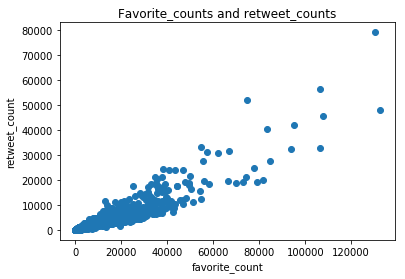

In [60]:
# sort favorite_count and corresponding retweet_count ascending
favorite_counts = df.favorite_count.sort_values()
retweet_counts = df.loc[favorite_counts.index].retweet_count
X = favorite_counts.values
Y = retweet_counts.values

plt.scatter(X, Y)
plt.title('Favorite_counts and retweet_counts')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

***Conclude***

From plot above, we can see favorite_count have a positive correlation with retweet_count. 

Also, retweet_count largely smaller than favorite_count, since it's more bothering to make a retweet than press like button. With this point, we could use retweet_count as a more rigid source to evaluate how people like these tweets.

### Q3. Is there any relation between time and favorite_counts

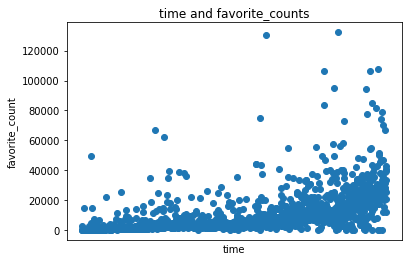

In [61]:
# sort favorite_count and corresponding retweet_count ascending
time_ = df.timestamp.sort_values()
favorite_counts = df.loc[time_.index].favorite_count
X = time_.values
Y = favorite_counts.values

plt.scatter(X, Y)
plt.title('time and favorite_counts')
plt.xlabel('time')
plt.ylabel('favorite_count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

We also curious will time the tweet posted affect favorite count. Next, we'll split time into four periods:

- 23:00:00 - 8:00:00

- 8:00:00 - 12:00:00

- 12:00:00 - 18:00:00

- 18:00:00 - 23:00:00

Text(0.5,0,'time')

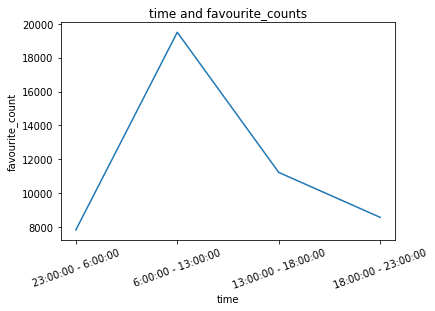

In [62]:
df_time_favorite = df[['favorite_count']].set_index(pd.DatetimeIndex(df['timestamp']))
# split time into four periods
df_night = df_time_favorite.between_time('23:00:00', '6:00:00')
df_morning = df_time_favorite.between_time('6:00:00', '13:00:00')
df_afternoon = df_time_favorite.between_time('13:00:00', '18:00:00')
df_evening = df_time_favorite.between_time('18:00:00', '23:00:00')
# plot
Y = [df_night.mean(), df_morning.mean(), df_afternoon.mean(), df_evening.mean()]
plt.plot(Y)
plt.title('time and favourite_counts')
plt.ylabel('favourite_count')
plt.xticks(np.arange(4), ('23:00:00 - 6:00:00', '6:00:00 - 13:00:00', '13:00:00 - 18:00:00', '18:00:00 - 23:00:00'), rotation=20)
plt.xlabel('time')

***Conclude***

Basically, there's a positive correlation betweet these two variables, which is not very rigid. 

We could also observe there's some points where much more favorite_count than expected, and at any time, there are tweets not very popular.

In next plot, we could observe that tweets posted in day get more favorite than those tweeted in night.

### Q4. How many source of tweets?

In [63]:
df.source.value_counts()

Twitter for iPhone     2047
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

***Conclude***

Of course, we could do this by observation.

iPhone is most used platform, which is not surprised, then we have three other platforms, both are far less used than iPhone.

### Q5. Which stage of dogs get most highest score?

In [64]:
df.groupby('Stage').score.describe()

,count,mean,std,min,25%,50%,75%,max
Stage,,,,,,,,
doggo,84.0,1.173810,0.156096,0.5,1.1,1.2,1.3,1.4
floofer,9.0,1.188889,0.105409,1.0,1.1,1.2,1.3,1.3
pupper,232.0,1.084914,0.200402,0.3,1.0,1.1,1.2,2.7
puppo,25.0,1.208000,0.125565,0.9,1.2,1.2,1.3,1.4


***Conclude***

From table above, puppo is a little popular than other three stage of dogs. It has largest mean and little std, from it's qartile, we can further confirm the conclusion.

**Note**

I wonder if we could extract some example from doggo and pupper, then use hypothetical test to confirm it statistically.

### Q6. Will follower become more as time past?

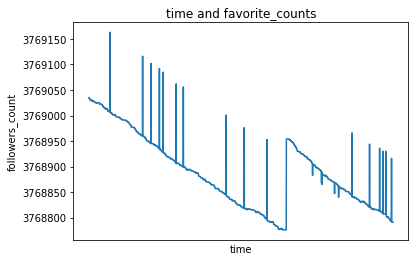

In [65]:
# sort favorite_count and corresponding retweet_count ascending
time_ = df.timestamp.sort_values()
followers_counts = df.loc[time_.index].followers_count
X = time_.values
Y = followers_counts.values

plt.plot(X, Y)
plt.title('time and favorite_counts')
plt.xlabel('time')
plt.ylabel('followers_count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

***Conclude***

So, we could tell from the plot that we don't always have more followers with time past, there are some peaks from time to time.

At the same time, the follower number fluctuate around 3,768,950.